# 特徴説明（T-SNE, K-means, Decision Tree) in sklearn

@masahiro rikiso, 170331

* http://qiita.com/konyavic/items/7ec60f72ec480726e00a

---

In [19]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
from  matplotlib.cm import brg # http://matplotlib.org/examples/color/colormaps_reference.html
import seaborn as sns
sns.set(style='white')

from sklearn.datasets import load_boston
from sklearn.manifold import TSNE

In [24]:
boston = load_boston(return_X_y=False)
X, y = load_boston(return_X_y=True)
model = TSNE(n_components=2)
tsne_result = model.fit_transform(X) 

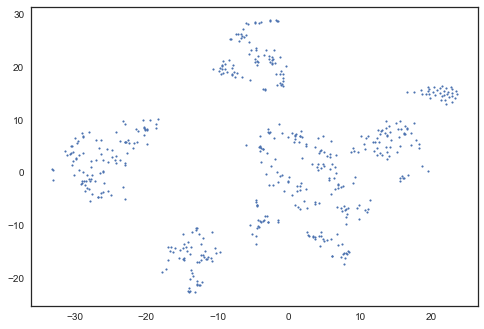

In [25]:
fig = plt.figure()
im = plt.scatter(tsne_result[:,0], tsne_result[:,1], s=3)
#fig.colorbar(im)

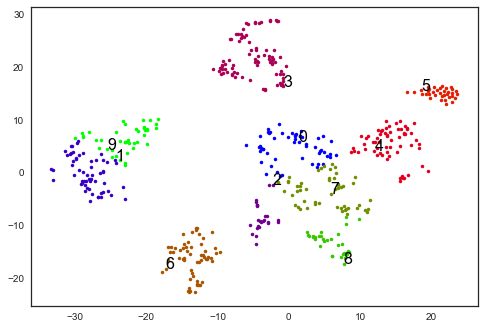

In [26]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=10, max_iter=300)
kmeans_tsne = kmeans.fit_predict(tsne_result)

#いい感じに色を付ける
color=brg(np.linspace(0,1,np.max(kmeans_tsne) - np.min(kmeans_tsne)+1))
for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    plt.plot(tsne_result[kmeans_tsne == i][:,0],
             tsne_result[kmeans_tsne == i][:,1],
             ".",
             color=color[i]
             )
    plt.text(tsne_result[kmeans_tsne == i][:,0][0],
             tsne_result[kmeans_tsne == i][:,1][0],
             str(i), color="black", size=16
             )

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
# dbscanは-1のクラスタが生成されるので、ラベルは-1から始まる
clf.classes_ = np.max(kmeans_tsne) - np.min(kmeans_tsne)
clf.fit(boston.data, kmeans_tsne)

# graphvizのdotファイルを生成する
with open("boston_tsne_dt.dot", 'w') as f:
    tree.export_graphviz(
        clf,
        out_file=f,
        feature_names=boston.feature_names,
        filled=True,
        rounded=True,  
        special_characters=True,
        impurity=False,
        proportion=False,
        class_names=map(str, range(-1, np.max(kmeans_tsne) - np.min(kmeans_tsne)))
    )

In [46]:
ls

170306adaboost.ipynb       170331tsne.ipynb
170306decision_tree.ipynb  boston_tsne_dt.dot
170306random_forest.ipynb  boston_tsne_dt.png
170331tsne-Copy1.ipynb


In [47]:
!dot -T png boston_tsne_dt.dot > boston_tsne_dt.png

In [48]:
from IPython.display import Image

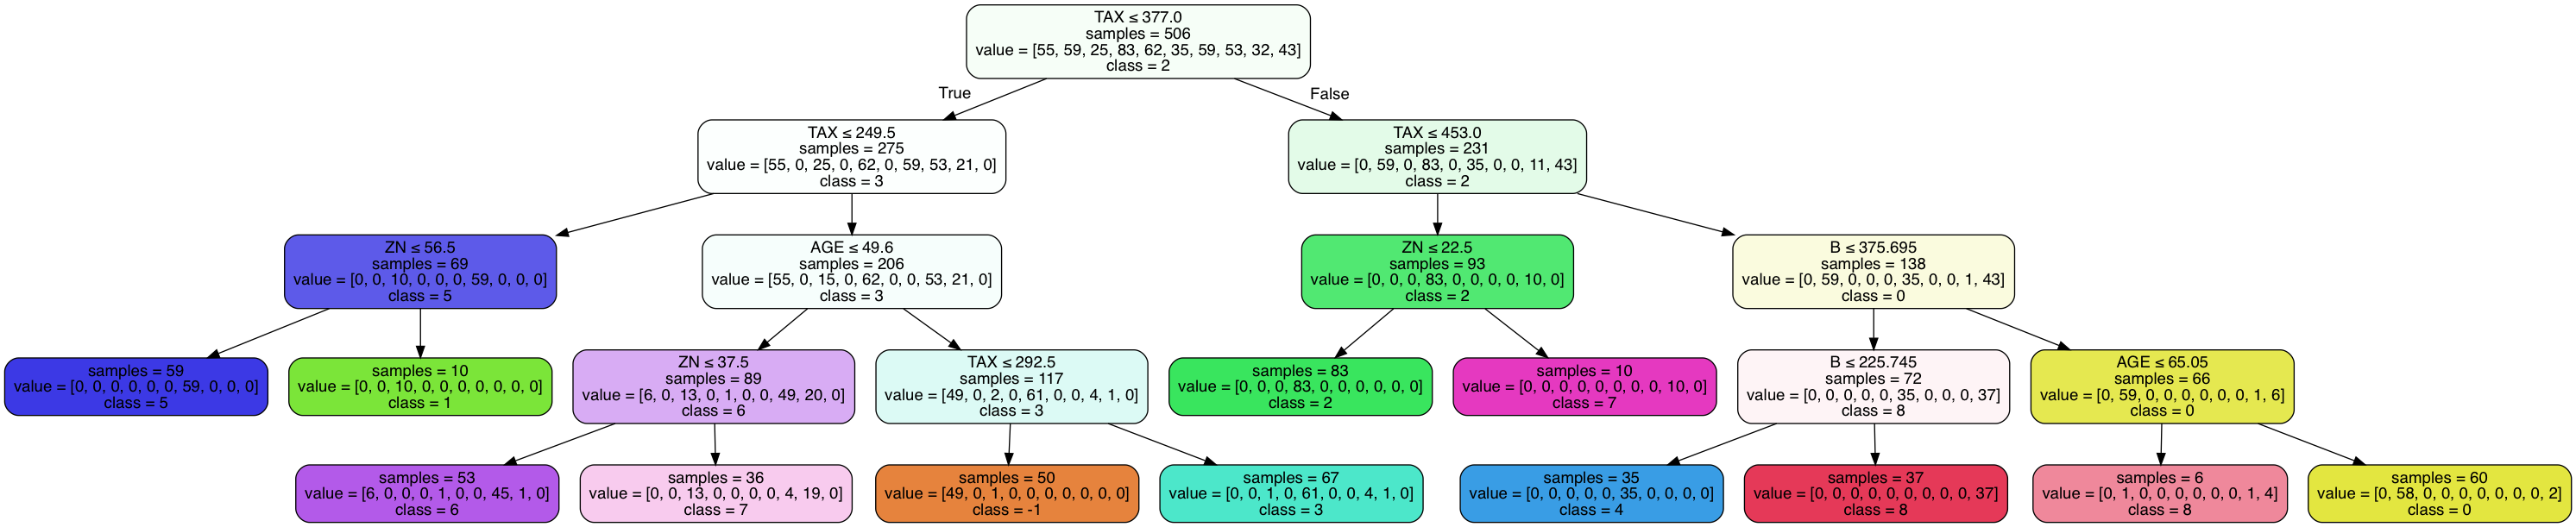

In [49]:
Image("boston_tsne_dt.png")

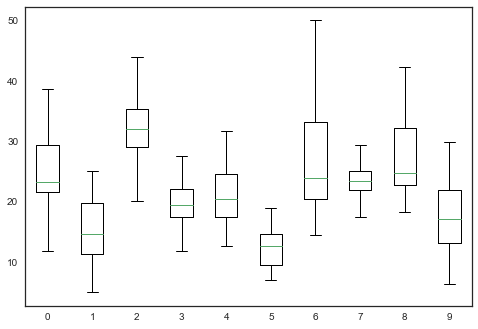

In [52]:
plt.boxplot([boston.target[kmeans_tsne == i]
             for i in range(np.min(kmeans_tsne), 
                            np.max(kmeans_tsne)+1)],
            labels=range(np.min(kmeans_tsne), 
                         np.max(kmeans_tsne)+1)
            );